In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

from config import *
from rle_decode import rle_decode

In [2]:
# Uploading a CSV file with annotations
df = pd.read_csv(train_csv_path)
df.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


In [20]:
# Adding a ship_count column
df['ship_count'] = df.groupby('ImageId')['EncodedPixels'].transform('count')

In [21]:
# Data overview
print(f"Number of records: {len(df)}")
print(df.info())
print(df.describe())

Number of records: 231723
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231723 entries, 0 to 231722
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ImageId        231723 non-null  object
 1   EncodedPixels  81723 non-null   object
 2   ShipSize       231723 non-null  uint64
 3   ship_count     231723 non-null  int64 
dtypes: int64(1), object(2), uint64(1)
memory usage: 7.1+ MB
None
            ShipSize     ship_count
count  231723.000000  231723.000000
mean      552.784415       1.344472
std      1846.497860       2.755929
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%       132.500000       1.000000
max     25904.000000      15.000000


In [22]:
# Grouping by number of ships
ship_counts = df.groupby('ImageId').size().reset_index(name='ship_count')

In [23]:
# Upload and visualize multiple images
def load_image(image_id, base_path=train_dir):
    image_path = os.path.join(base_path, image_id)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

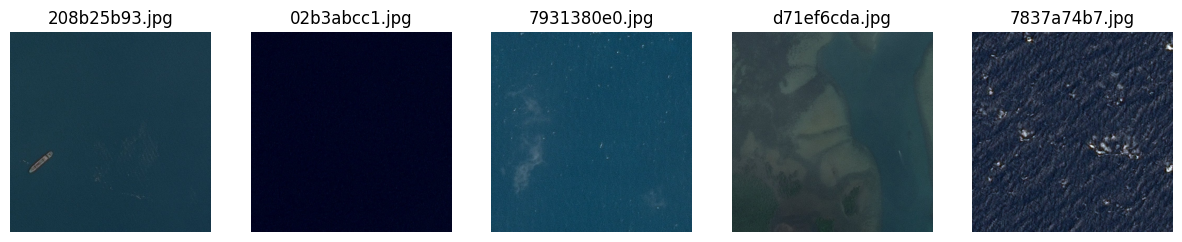

In [24]:
sample_images = df['ImageId'].sample(5).values
plt.figure(figsize=(15, 10))
for i, image_id in enumerate(sample_images):
    plt.subplot(1, 5, i+1)
    plt.imshow(load_image(image_id))
    plt.title(image_id)
    plt.axis('off')
plt.show()

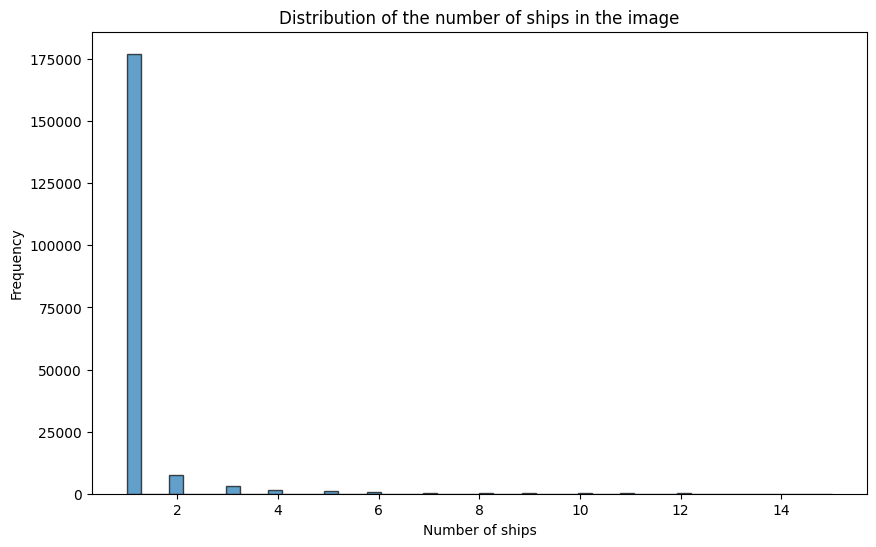

In [25]:
# Visualize the distribution of the number of ships in the image
plt.figure(figsize=(10, 6))
plt.hist(ship_counts['ship_count'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of the number of ships in the image')
plt.xlabel('Number of ships')
plt.ylabel('Frequency')
plt.show()

In [26]:
# Analyzing missing data
missing_data = df.isnull().sum()
print(f"Missing data:\n{missing_data}")

Відсутні дані:
ImageId               0
EncodedPixels    150000
ShipSize              0
ship_count            0
dtype: int64


In [27]:
# Number of unique images
unique_images = df['ImageId'].nunique()

# Number of images without ships
no_ship_images = df[df['EncodedPixels'].isnull()]['ImageId'].nunique()
print(f"Number of images without ships: {no_ship_images}")

# Number of images with ships
with_ship_images = unique_images - no_ship_images
print(f"Number of images with ships: {with_ship_images}")

Number of images without ships: 150000
Number of images with ships: 42556


In [28]:
# Total number of images
total_images = unique_images

# Percentage of images without ships
percent_no_ship = (no_ship_images / total_images) * 100

# Percentage of images with ships
percent_with_ship = (with_ship_images / total_images) * 100

# Displaying the results
print(f"Percentage of images without ships: {percent_no_ship:.2f}%")
print(f"Percentage of images with ships: {percent_with_ship:.2f}%")

Percentage of images without ships: 77.90%
Percentage of images with ships: 22.10%


C:\Users\Anastasiia\AppData\Local\Temp\ipykernel_15620\2518907571.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Percentage', data=data, palette='viridis')


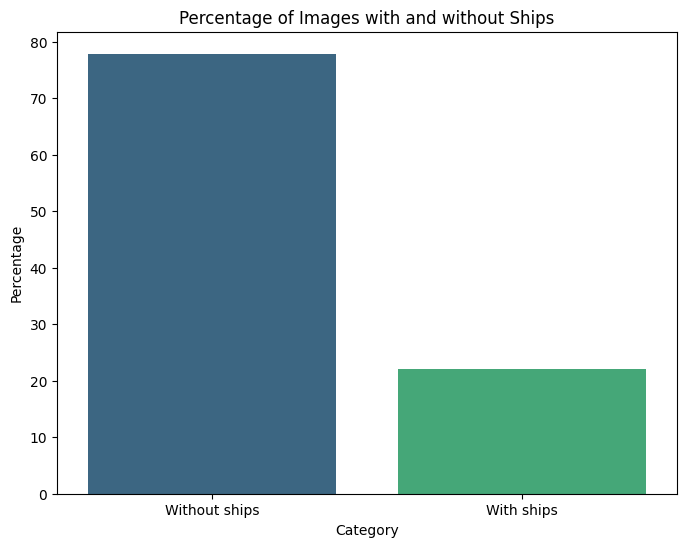

In [29]:
# Data for visualization
data = pd.DataFrame({
    'Category': ['Without ships', 'With ships'],
    'Count': [no_ship_images, with_ship_images],
    'Percentage': [percent_no_ship, percent_with_ship]
})

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Percentage', data=data, palette='viridis')
plt.title('Percentage of Images with and without Ships')
plt.ylabel('Percentage')
plt.show()

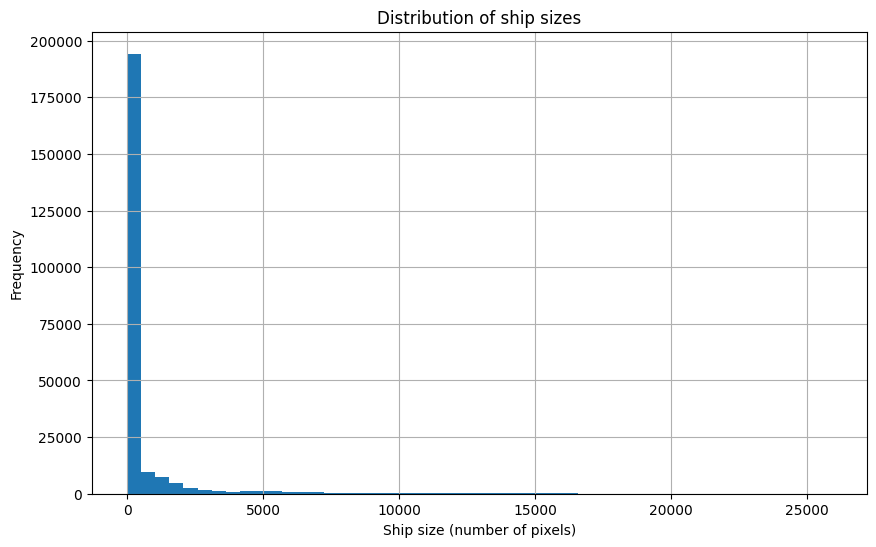

In [30]:
# Adding a ship size to a DataFrame
df['ShipSize'] = df['EncodedPixels'].apply(lambda x: np.sum(rle_decode(x)) if pd.notnull(x) else 0)

# Visualization of the distribution of ship sizes
plt.figure(figsize=(10, 6))
df['ShipSize'].hist(bins=50)
plt.title('Distribution of ship sizes')
plt.xlabel('Ship size (number of pixels)')
plt.ylabel('Frequency')
plt.show()

In [36]:
# Function for visualizing images
def plot_images(images, title):
    num_images = len(images)
    plt.figure(figsize=(15, 3))
    for i, image_id in enumerate(images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(load_image(image_id))
        plt.title(image_id, fontsize=8)
        plt.axis('off')
    plt.suptitle(title, fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

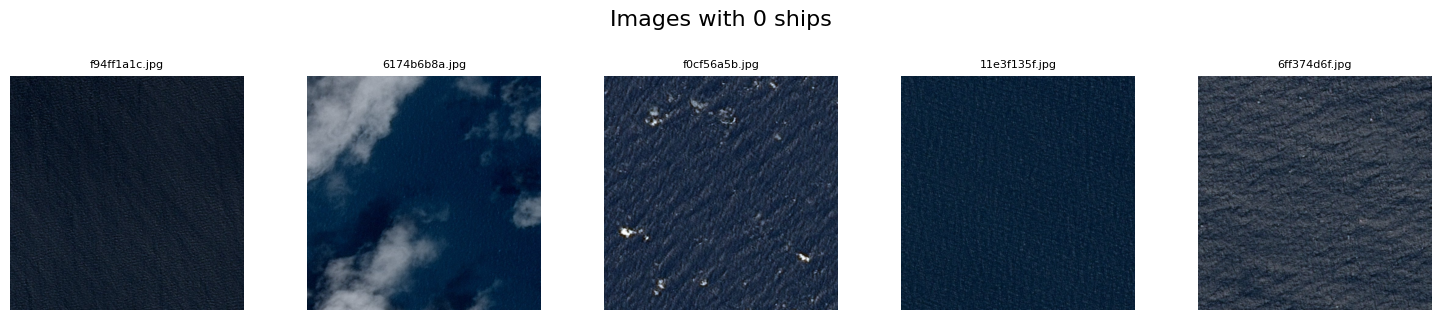

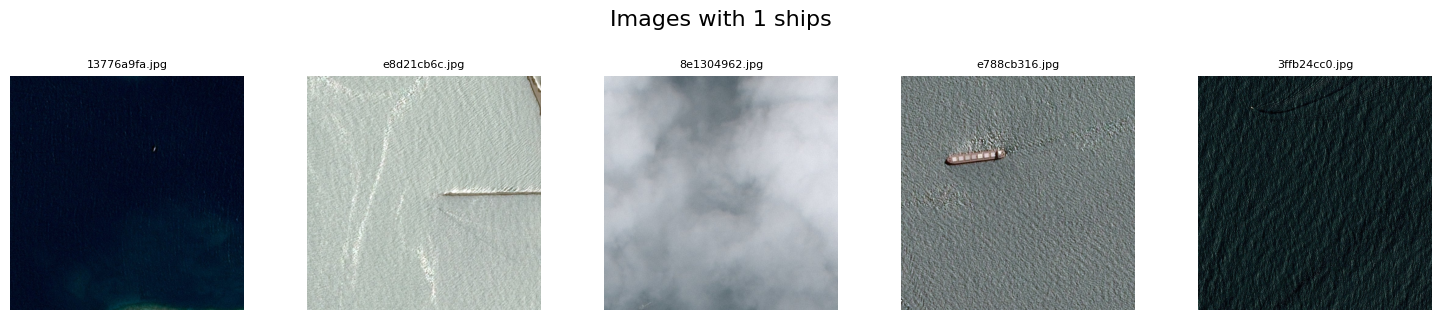

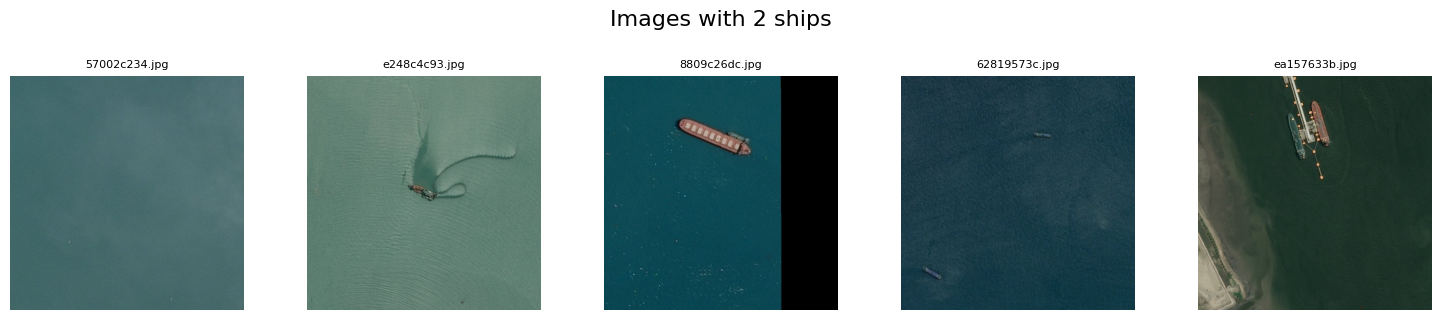

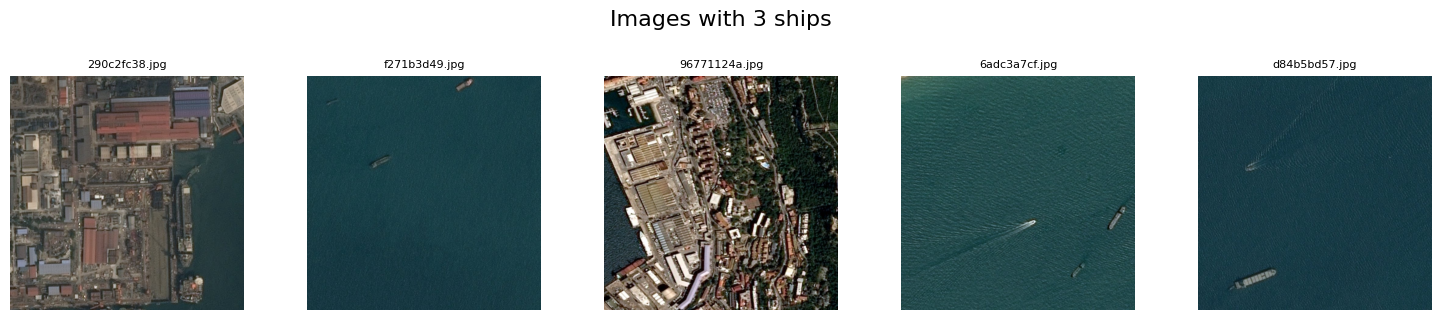

In [38]:
def plot_images_by_ship_count(ship_count, num_images=5):
    sample_images = df[df['ship_count'] == ship_count]['ImageId'].sample(num_images).values
    plot_images(sample_images, f'Images with {ship_count} ships')

# Image visualization
plot_images_by_ship_count(0)  # Images without ships
plot_images_by_ship_count(1)  # Image with one ship
plot_images_by_ship_count(2)  # Image with two ships
plot_images_by_ship_count(3)  # Image with three ships

##### Conclusions

Distribution of the number of ships in the images:

- Most images `(about 77.90%)` do not contain any ships. 
- About `22.10%` of images contain at least one ship. 
- Most images have one ship, fewer with two and three ships, and even fewer with more ships.

Visualization of images:

- Displaying images with different numbers of ships allows to see the variety in the size of the ships in the images. 
- The number of ships in the image does not affect the ships size.